In [1]:
import pandas as pd
import numpy as np
import uproot
import matplotlib
from matplotlib import pyplot as plt
from __future__ import division
from tqdm import tqdm

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
input_bkg = [#'trees/MaxDigis_tree_Neutrino_gun.root',
             'trees/MaxDigis_tree_Data.root',
            ]
first_sig = ['trees/MaxDigis_tree_HTo2LongLivedTo4b_MH-125_MFF-25_CTau-15000mm_TuneCP5_14TeV_pythia8.root']
input_sig = ['trees/MaxDigis_tree_HTo2LongLivedTo4b_MH-125_MFF-25_CTau-1500mm_TuneCP5_14TeV_pythia8.root',
             #'trees/MaxDigis_tree_HTo2LongLivedTo4b_MH-1000_MFF-450_CTau-100000mm_TuneCP5_14TeV_pythia8.root',
             #'trees/MaxDigis_tree_HTo2LongLivedTo4b_MH-1000_MFF-450_CTau-10000mm_TuneCP5_14TeV_pythia8.root',
             'trees/MaxDigis_tree_HTo2LongLivedTo4b_MH-125_MFF-12_CTau-9000mm_TuneCP5_14TeV_pythia8.root',
             'trees/MaxDigis_tree_HTo2LongLivedTo4b_MH-125_MFF-12_CTau-900mm_TuneCP5_14TeV_pythia8.root',
             'trees/MaxDigis_tree_HTo2LongLivedTo4b_MH-125_MFF-50_CTau-30000mm_TuneCP5_14TeV_pythia8.root',
             'trees/MaxDigis_tree_HTo2LongLivedTo4b_MH-125_MFF-50_CTau-3000mm_TuneCP5_14TeV_pythia8.root',
            ]
comp_treename = 'comparator'
wire_treename = 'wire'

comp_vars = [ 'Ev_max_nComp_ME11','Ev_max_nComp_ME12','Ev_max_nComp_ME13','Ev_max_nComp_ME21','Ev_max_nComp_ME22',
             'Ev_max_nComp_ME31','Ev_max_nComp_ME32','Ev_max_nComp_ME41','Ev_max_nComp_ME42']
wire_vars = [ 'Ev_max_nWire_ME11','Ev_max_nWire_ME12','Ev_max_nWire_ME13','Ev_max_nWire_ME21','Ev_max_nWire_ME22',
             'Ev_max_nWire_ME31','Ev_max_nWire_ME32','Ev_max_nWire_ME41','Ev_max_nWire_ME42']

#all_vars = [ 'Ev_nComp_ME11','Ev_nComp_ME12']

comp_vars = list(set(comp_vars))
wire_vars = list(set(wire_vars))

arrs_comp_sig = [None]*(len(input_sig)+1)
arrs_wire_sig = [None]*(len(input_sig)+1)

print "Opening input files"

print "Opening file: ", first_sig
arrs_comp_sig[0] = uproot.open(first_sig[0])[comp_treename]
arrs_wire_sig[0] = uproot.open(first_sig[0])[wire_treename]
comp_sig = arrs_comp_sig[0].pandas.df(comp_vars)
wire_sig = arrs_wire_sig[0].pandas.df(wire_vars)

j=1
for i in (input_sig):
    print "Opening file: ", i
    arrs_comp_sig[j] = uproot.open(i)[comp_treename]
    arrs_wire_sig[j] = uproot.open(i)[wire_treename]
    temp_comp_sig = arrs_comp_sig[j].pandas.df(comp_vars)
    temp_wire_sig = arrs_wire_sig[j].pandas.df(wire_vars)
    comp_sig = comp_sig.append(temp_comp_sig)
    wire_sig = wire_sig.append(temp_wire_sig)
    j=j+1


print "Opening file: ", input_bkg
arrs_comp_bkg = uproot.open(input_bkg[0])[comp_treename]
arrs_wire_bkg = uproot.open(input_bkg[0])[wire_treename]
comp_bkg = arrs_comp_bkg.pandas.df(comp_vars)
wire_bkg = arrs_wire_bkg.pandas.df(wire_vars)

Opening input files
Opening file:  ['trees/MaxDigis_tree_HTo2LongLivedTo4b_MH-125_MFF-25_CTau-15000mm_TuneCP5_14TeV_pythia8.root']
Opening file:  trees/MaxDigis_tree_HTo2LongLivedTo4b_MH-125_MFF-25_CTau-1500mm_TuneCP5_14TeV_pythia8.root
Opening file:  trees/MaxDigis_tree_HTo2LongLivedTo4b_MH-125_MFF-12_CTau-9000mm_TuneCP5_14TeV_pythia8.root
Opening file:  trees/MaxDigis_tree_HTo2LongLivedTo4b_MH-125_MFF-12_CTau-900mm_TuneCP5_14TeV_pythia8.root
Opening file:  trees/MaxDigis_tree_HTo2LongLivedTo4b_MH-125_MFF-50_CTau-30000mm_TuneCP5_14TeV_pythia8.root
Opening file:  trees/MaxDigis_tree_HTo2LongLivedTo4b_MH-125_MFF-50_CTau-3000mm_TuneCP5_14TeV_pythia8.root
Opening file:  ['trees/MaxDigis_tree_Data.root']


# Single Limit

In [3]:
# efficiency=[0]
# comp_sig_tot = len(comp_sig)
# rate=[0]
# comp_bkg_tot = len(comp_bkg)

# min_=30
# max_=60
# it=5

# for comp11 in tqdm(xrange(min_,max_,it)):
#   for comp12 in xrange(min_,max_,it):
#     for comp13 in xrange(min_,max_,it):
#       for comp21 in xrange(min_,max_,it):
#         for comp22 in xrange(min_,max_,it):
#           for comp31 in xrange(min_,max_,it):
#             for comp32 in xrange(min_,max_,it):
#               for comp41 in xrange(min_,max_,it):
#                 for comp42 in xrange(min_,max_,it):

#                   efficiency.append(len(comp_sig[(comp_sig['Ev_max_nComp_ME11'] > comp11) | (comp_sig['Ev_max_nComp_ME12'] > comp12) | (comp_sig['Ev_max_nComp_ME13'] > comp13) |
#                                                  (comp_sig['Ev_max_nComp_ME21'] > comp21) | (comp_sig['Ev_max_nComp_ME22'] > comp22) |
#                                                  (comp_sig['Ev_max_nComp_ME31'] > comp31) | (comp_sig['Ev_max_nComp_ME32'] > comp32) |
#                                                  (comp_sig['Ev_max_nComp_ME41'] > comp41) | (comp_sig['Ev_max_nComp_ME41'] > comp42)])/comp_sig_tot*100)
                
#                   rate.append(len(comp_bkg[(comp_bkg['Ev_max_nComp_ME11'] > comp11) | (comp_bkg['Ev_max_nComp_ME12'] > comp12) | (comp_bkg['Ev_max_nComp_ME13'] > comp13) |
#                                            (comp_bkg['Ev_max_nComp_ME21'] > comp21) | (comp_bkg['Ev_max_nComp_ME22'] > comp22) |
#                                            (comp_bkg['Ev_max_nComp_ME31'] > comp31) | (comp_bkg['Ev_max_nComp_ME32'] > comp32) |
#                                            (comp_bkg['Ev_max_nComp_ME41'] > comp41) | (comp_bkg['Ev_max_nComp_ME41'] > comp42)])/comp_bkg_tot*30*1000)

In [4]:
# comp_efficiency=[0]
# comp_sig_tot = len(comp_sig)
# comp_rate=[0]
# comp_bkg_tot = len(comp_bkg)
# comp_limits=[0]

# min_=0
# max_=120
# it_=1

# for limit in tqdm(xrange(min_,max_,it_)):
#     comp_efficiency.append(len(comp_sig[#(comp_sig['Ev_max_nComp_ME11'] > limit) | (comp_sig['Ev_max_nComp_ME12'] > limit) | (comp_sig['Ev_max_nComp_ME13'] > limit) |
#                                         (comp_sig['Ev_max_nComp_ME21'] > limit) | (comp_sig['Ev_max_nComp_ME22'] > limit) |
#                                         (comp_sig['Ev_max_nComp_ME31'] > limit) | (comp_sig['Ev_max_nComp_ME32'] > limit) |
#                                         (comp_sig['Ev_max_nComp_ME41'] > limit) | (comp_sig['Ev_max_nComp_ME41'] > limit)])/comp_sig_tot*100)
    
#     comp_rate.append(len(comp_bkg[#(comp_bkg['Ev_max_nComp_ME11'] > limit) | (comp_bkg['Ev_max_nComp_ME12'] > limit) | (comp_bkg['Ev_max_nComp_ME13'] > limit) |
#                                   (comp_bkg['Ev_max_nComp_ME21'] > limit) | (comp_bkg['Ev_max_nComp_ME22'] > limit) |
#                                   (comp_bkg['Ev_max_nComp_ME31'] > limit) | (comp_bkg['Ev_max_nComp_ME32'] > limit) |
#                                   (comp_bkg['Ev_max_nComp_ME41'] > limit) | (comp_bkg['Ev_max_nComp_ME41'] > limit)])/comp_bkg_tot*30*1000)
    
#     comp_limits.append(limit)

In [5]:
# plt.plot(comp_rate,comp_efficiency,'bo')
# plt.xlim(0,1)
# plt.ylim(0,40)
# plt.xlabel('Rate (kHz)')
# plt.ylabel('Efficiency (%)')
# plt.title('Comparator ROC Curve')

In [6]:
# for i in range(len(comp_rate)):
#     if comp_rate[i] > 0.4 and comp_rate[i] < 1:
#         print 'rate =', comp_rate[i], 'kHz and efficiency =', comp_efficiency[i], '% for threshold >', comp_limits[i]

In [7]:
# wire_efficiency=[0]
# wire_sig_tot = len(wire_sig)
# wire_rate=[0]
# wire_bkg_tot = len(wire_bkg)
# wire_limits=[0]

# min_=0
# max_=120
# it_=1

# for limit in tqdm(xrange(min_,max_,it_)):
#     wire_efficiency.append(len(wire_sig[#(wire_sig['Ev_max_nWire_ME11'] > limit) | (wire_sig['Ev_max_nWire_ME12'] > limit) | (wire_sig['Ev_max_nWire_ME13'] > limit) |
#                                         (wire_sig['Ev_max_nWire_ME21'] > limit) | (wire_sig['Ev_max_nWire_ME22'] > limit) |
#                                         (wire_sig['Ev_max_nWire_ME31'] > limit) | (wire_sig['Ev_max_nWire_ME32'] > limit) |
#                                         (wire_sig['Ev_max_nWire_ME41'] > limit) | (wire_sig['Ev_max_nWire_ME41'] > limit)])/wire_sig_tot*100)
    
#     wire_rate.append(len(wire_bkg[#(wire_bkg['Ev_max_nWire_ME11'] > limit) | (wire_bkg['Ev_max_nWire_ME12'] > limit) | (wire_bkg['Ev_max_nWire_ME13'] > limit) |
#                                   (wire_bkg['Ev_max_nWire_ME21'] > limit) | (wire_bkg['Ev_max_nWire_ME22'] > limit) |
#                                   (wire_bkg['Ev_max_nWire_ME31'] > limit) | (wire_bkg['Ev_max_nWire_ME32'] > limit) |
#                                   (wire_bkg['Ev_max_nWire_ME41'] > limit) | (wire_bkg['Ev_max_nWire_ME41'] > limit)])/wire_bkg_tot*30*1000)
    
#     wire_limits.append(limit)

In [8]:
# plt.plot(wire_rate,wire_efficiency,'bo')
# plt.xlim(0,1)
# plt.ylim(0,40)
# plt.xlabel('Rate (kHz)')
# plt.ylabel('Efficiency (%)')
# plt.title('Wire ROC Curve')

In [9]:
# for i in range(len(wire_rate)):
#     if wire_rate[i] > 0.4 and wire_rate[i] < 1.0:
#         print 'rate =', wire_rate[i], 'kHz and efficiency =', wire_efficiency[i], '% for threshold >', wire_limits[i]

# Declare General Variables

In [10]:
min_=0
max_=150
it_=1

r1=2
r2=3

l1=.12
l2=.2

# Comparator

100%|██████████| 150/150 [00:02<00:00, 64.45it/s]


Best threshold > 97
rate = 0.0193391241117 kHz and efficiency = 0.0315656565657 % for threshold > 97


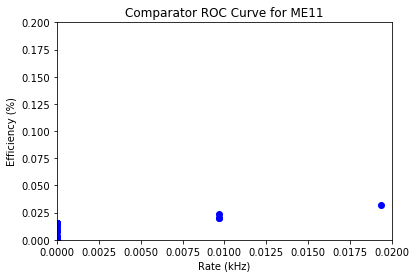

In [11]:
comp_efficiency=[0]
comp_sig_tot = len(comp_sig)
comp_rate=[0]
comp_bkg_tot = len(comp_bkg)
comp_limits=[0]
best = 0.0
best_cut = 150

for limit in tqdm(xrange(min_,max_,it_)):
    comp_efficiency.append(len(comp_sig[(comp_sig['Ev_max_nComp_ME11'] > limit)])/comp_sig_tot*100)
    
    comp_rate.append(len(comp_bkg[(comp_bkg['Ev_max_nComp_ME11'] > limit)])/comp_bkg_tot*30*1000)
    
    comp_limits.append(limit)
    
plt.plot(comp_rate,comp_efficiency,'bo')
plt.xlim(0,.02)
plt.ylim(0,.2)
plt.xlabel('Rate (kHz)')
plt.ylabel('Efficiency (%)')
plt.title('Comparator ROC Curve for ME11')

for i in range(len(comp_rate)):
    if comp_rate[i] > 0 and comp_rate[i] < 0.02:
    #if comp_rate[i] > 0:
        #print 'rate =', comp_rate[i], 'kHz and efficiency =', comp_efficiency[i], '% for threshold >', comp_limits[i]
        if np.power(comp_efficiency[i],r1)/np.sqrt(comp_rate[i]) > best:
            best = np.power(comp_efficiency[i],r1)/np.sqrt(comp_rate[i])
            best_cut = comp_limits[i]
        
print "Best threshold > %i" %(best_cut)
print 'rate =', comp_rate[best_cut+1], 'kHz and efficiency =', comp_efficiency[best_cut+1], '% for threshold >', comp_limits[best_cut+1]
comp11 = best_cut

100%|██████████| 150/150 [00:00<00:00, 168.60it/s]


Best threshold > 56
rate = 0.193391241117 kHz and efficiency = 4.09169823232 % for threshold > 56


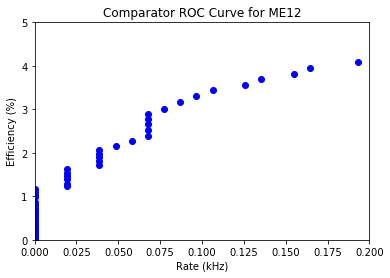

In [12]:
comp_efficiency=[0]
comp_sig_tot = len(comp_sig)
comp_rate=[0]
comp_bkg_tot = len(comp_bkg)
comp_limits=[0]
best = 0.0
best_cut = 150

for limit in tqdm(xrange(min_,max_,it_)):
    comp_efficiency.append(len(comp_sig[(comp_sig['Ev_max_nComp_ME12'] > limit)])/comp_sig_tot*100)
    
    comp_rate.append(len(comp_bkg[(comp_bkg['Ev_max_nComp_ME12'] > limit)])/comp_bkg_tot*30*1000)
    
    comp_limits.append(limit)
    
plt.plot(comp_rate,comp_efficiency,'bo')
plt.xlim(0,l2)
plt.ylim(0,5)
plt.xlabel('Rate (kHz)')
plt.ylabel('Efficiency (%)')
plt.title('Comparator ROC Curve for ME12')

for i in range(len(comp_rate)):
    if comp_rate[i] > 0.02 and comp_rate[i] < l2:
    #if comp_rate[i] > 0:
        #print 'rate =', comp_rate[i], 'kHz and efficiency =', comp_efficiency[i], '% for threshold >', comp_limits[i]
        if np.power(comp_efficiency[i],r2)/np.sqrt(comp_rate[i]) > best:
            best = np.power(comp_efficiency[i],r2)/np.sqrt(comp_rate[i])
            best_cut = comp_limits[i]
        
print "Best threshold > %i" %(best_cut)
print 'rate =', comp_rate[best_cut+1], 'kHz and efficiency =', comp_efficiency[best_cut+1], '% for threshold >', comp_limits[best_cut+1]
comp12 = best_cut

100%|██████████| 150/150 [00:00<00:00, 238.96it/s]


Best threshold > 24
rate = 0.135373868782 kHz and efficiency = 3.75631313131 % for threshold > 24


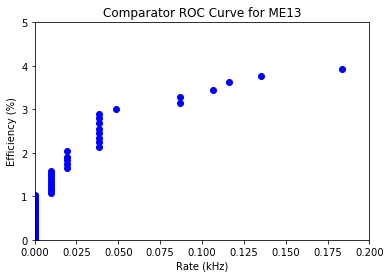

In [13]:
comp_efficiency=[0]
comp_sig_tot = len(comp_sig)
comp_rate=[0]
comp_bkg_tot = len(comp_bkg)
comp_limits=[0]
best = 0.0
best_cut = 150

for limit in tqdm(xrange(min_,max_,it_)):
    comp_efficiency.append(len(comp_sig[(comp_sig['Ev_max_nComp_ME13'] > limit)])/comp_sig_tot*100)
    
    comp_rate.append(len(comp_bkg[(comp_bkg['Ev_max_nComp_ME13'] > limit)])/comp_bkg_tot*30*1000)
    
    comp_limits.append(limit)
    
plt.plot(comp_rate,comp_efficiency,'bo')
plt.xlim(0,l2)
plt.ylim(0,5)
plt.xlabel('Rate (kHz)')
plt.ylabel('Efficiency (%)')
plt.title('Comparator ROC Curve for ME13')

for i in range(len(comp_rate)):
    if comp_rate[i] > 0.02 and comp_rate[i] < l2:
    #if comp_rate[i] > 0:
        #print 'rate =', comp_rate[i], 'kHz and efficiency =', comp_efficiency[i], '% for threshold >', comp_limits[i]
        if np.power(comp_efficiency[i],r2)/np.sqrt(comp_rate[i]) > best:
            best = np.power(comp_efficiency[i],r2)/np.sqrt(comp_rate[i])
            best_cut = comp_limits[i]
        
print "Best threshold > %i" %(best_cut)
print 'rate =', comp_rate[best_cut+1], 'kHz and efficiency =', comp_efficiency[best_cut+1], '% for threshold >', comp_limits[best_cut+1]
comp13 = best_cut

100%|██████████| 150/150 [00:01<00:00, 96.21it/s]


Best threshold > 49
rate = 0.0386782482235 kHz and efficiency = 3.20391414141 % for threshold > 49


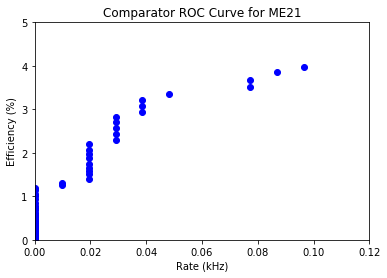

In [14]:
comp_efficiency=[0]
comp_sig_tot = len(comp_sig)
comp_rate=[0]
comp_bkg_tot = len(comp_bkg)
comp_limits=[0]
best = 0.0
best_cut = 150

for limit in tqdm(xrange(min_,max_,it_)):
    comp_efficiency.append(len(comp_sig[(comp_sig['Ev_max_nComp_ME21'] > limit)])/comp_sig_tot*100)
    
    comp_rate.append(len(comp_bkg[(comp_bkg['Ev_max_nComp_ME21'] > limit)])/comp_bkg_tot*30*1000)
    
    comp_limits.append(limit)
    
plt.plot(comp_rate,comp_efficiency,'bo')
plt.xlim(0,l1)
plt.ylim(0,5)
plt.xlabel('Rate (kHz)')
plt.ylabel('Efficiency (%)')
plt.title('Comparator ROC Curve for ME21')

for i in range(len(comp_rate)):
    if comp_rate[i] > 0.02 and comp_rate[i] < l1:
    #if comp_rate[i] > 0:
        #print 'rate =', comp_rate[i], 'kHz and efficiency =', comp_efficiency[i], '% for threshold >', comp_limits[i]
        if np.power(comp_efficiency[i],r1)/np.sqrt(comp_rate[i]) > best:
            best = np.power(comp_efficiency[i],r1)/np.sqrt(comp_rate[i])
            best_cut = comp_limits[i]
        
print "Best threshold > %i" %(best_cut)
print 'rate =', comp_rate[best_cut+1], 'kHz and efficiency =', comp_efficiency[best_cut+1], '% for threshold >', comp_limits[best_cut+1]
comp21 = best_cut

100%|██████████| 150/150 [00:00<00:00, 192.76it/s]


Best threshold > 35
rate = 0.183721679061 kHz and efficiency = 6.72743055556 % for threshold > 35


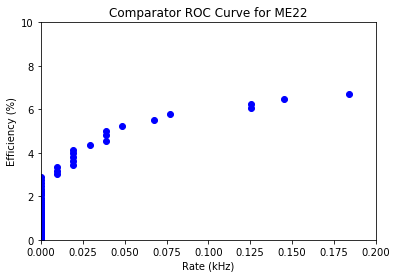

In [15]:
comp_efficiency=[0]
comp_sig_tot = len(comp_sig)
comp_rate=[0]
comp_bkg_tot = len(comp_bkg)
comp_limits=[0]
best = 0.0
best_cut = 150

for limit in tqdm(xrange(min_,max_,it_)):
    comp_efficiency.append(len(comp_sig[(comp_sig['Ev_max_nComp_ME22'] > limit)])/comp_sig_tot*100)
    
    comp_rate.append(len(comp_bkg[(comp_bkg['Ev_max_nComp_ME22'] > limit)])/comp_bkg_tot*30*1000)
    
    comp_limits.append(limit)
    
plt.plot(comp_rate,comp_efficiency,'bo')
plt.xlim(0,l2)
plt.ylim(0,10)
plt.xlabel('Rate (kHz)')
plt.ylabel('Efficiency (%)')
plt.title('Comparator ROC Curve for ME22')

for i in range(len(comp_rate)):
    if comp_rate[i] > 0.02 and comp_rate[i] < l2:
    #if comp_rate[i] > 0:
        #print 'rate =', comp_rate[i], 'kHz and efficiency =', comp_efficiency[i], '% for threshold >', comp_limits[i]
        if np.power(comp_efficiency[i],r2)/np.sqrt(comp_rate[i]) > best:
            best = np.power(comp_efficiency[i],r2)/np.sqrt(comp_rate[i])
            best_cut = comp_limits[i]
        
print "Best threshold > %i" %(best_cut)
print 'rate =', comp_rate[best_cut+1], 'kHz and efficiency =', comp_efficiency[best_cut+1], '% for threshold >', comp_limits[best_cut+1]
comp22 = best_cut

100%|██████████| 150/150 [00:01<00:00, 131.39it/s]


Best threshold > 42
rate = 0.0966956205586 kHz and efficiency = 3.73658459596 % for threshold > 42


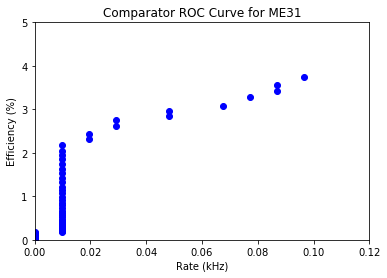

In [16]:
comp_efficiency=[0]
comp_sig_tot = len(comp_sig)
comp_rate=[0]
comp_bkg_tot = len(comp_bkg)
comp_limits=[0]
best = 0.0
best_cut = 150

for limit in tqdm(xrange(min_,max_,it_)):
    comp_efficiency.append(len(comp_sig[(comp_sig['Ev_max_nComp_ME31'] > limit)])/comp_sig_tot*100)
    
    comp_rate.append(len(comp_bkg[(comp_bkg['Ev_max_nComp_ME31'] > limit)])/comp_bkg_tot*30*1000)
    
    comp_limits.append(limit)
    
plt.plot(comp_rate,comp_efficiency,'bo')
plt.xlim(0,l1)
plt.ylim(0,5)
plt.xlabel('Rate (kHz)')
plt.ylabel('Efficiency (%)')
plt.title('Comparator ROC Curve for ME31')

for i in range(len(comp_rate)):
    if comp_rate[i] > 0.02 and comp_rate[i] < l1:
    #if comp_rate[i] > 0:
        #print 'rate =', comp_rate[i], 'kHz and efficiency =', comp_efficiency[i], '% for threshold >', comp_limits[i]
        if np.power(comp_efficiency[i],r1)/np.sqrt(comp_rate[i]) > best:
            best = np.power(comp_efficiency[i],r1)/np.sqrt(comp_rate[i])
            best_cut = comp_limits[i]
        
print "Best threshold > %i" %(best_cut)
print 'rate =', comp_rate[best_cut+1], 'kHz and efficiency =', comp_efficiency[best_cut+1], '% for threshold >', comp_limits[best_cut+1]
comp31 = best_cut

100%|██████████| 150/150 [00:00<00:00, 222.66it/s]


Best threshold > 28
rate = 0.154712992894 kHz and efficiency = 6.26183712121 % for threshold > 28


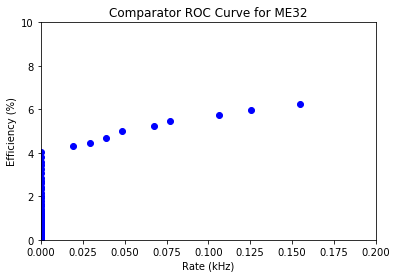

In [17]:
comp_efficiency=[0]
comp_sig_tot = len(comp_sig)
comp_rate=[0]
comp_bkg_tot = len(comp_bkg)
comp_limits=[0]
best = 0.0
best_cut = 150

for limit in tqdm(xrange(min_,max_,it_)):
    comp_efficiency.append(len(comp_sig[(comp_sig['Ev_max_nComp_ME32'] > limit)])/comp_sig_tot*100)
    
    comp_rate.append(len(comp_bkg[(comp_bkg['Ev_max_nComp_ME32'] > limit)])/comp_bkg_tot*30*1000)
    
    comp_limits.append(limit)
    
plt.plot(comp_rate,comp_efficiency,'bo')
plt.xlim(0,l2)
plt.ylim(0,10)
plt.xlabel('Rate (kHz)')
plt.ylabel('Efficiency (%)')
plt.title('Comparator ROC Curve for ME32')

for i in range(len(comp_rate)):
    if comp_rate[i] > 0.02 and comp_rate[i] < l2:
    #if comp_rate[i] > 0:
        #print 'rate =', comp_rate[i], 'kHz and efficiency =', comp_efficiency[i], '% for threshold >', comp_limits[i]
        if np.power(comp_efficiency[i],r2)/np.sqrt(comp_rate[i]) > best:
            best = np.power(comp_efficiency[i],r2)/np.sqrt(comp_rate[i])
            best_cut = comp_limits[i]
        
print "Best threshold > %i" %(best_cut)
print 'rate =', comp_rate[best_cut+1], 'kHz and efficiency =', comp_efficiency[best_cut+1], '% for threshold >', comp_limits[best_cut+1]
comp32 = best_cut

100%|██████████| 150/150 [00:01<00:00, 135.57it/s]


Best threshold > 42
rate = 0.0773564964469 kHz and efficiency = 5.10969065657 % for threshold > 42


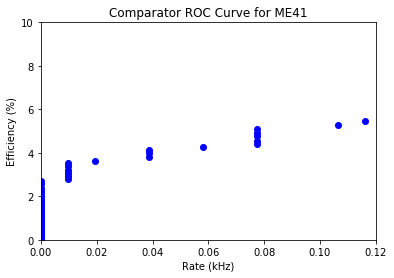

In [18]:
comp_efficiency=[0]
comp_sig_tot = len(comp_sig)
comp_rate=[0]
comp_bkg_tot = len(comp_bkg)
comp_limits=[0]
best = 0.0
best_cut = 150

for limit in tqdm(xrange(min_,max_,it_)):
    comp_efficiency.append(len(comp_sig[(comp_sig['Ev_max_nComp_ME41'] > limit)])/comp_sig_tot*100)
    
    comp_rate.append(len(comp_bkg[(comp_bkg['Ev_max_nComp_ME41'] > limit)])/comp_bkg_tot*30*1000)
    
    comp_limits.append(limit)
    
plt.plot(comp_rate,comp_efficiency,'bo')
plt.xlim(0,l1)
plt.ylim(0,10)
plt.xlabel('Rate (kHz)')
plt.ylabel('Efficiency (%)')
plt.title('Comparator ROC Curve for ME41')

for i in range(len(comp_rate)):
    if comp_rate[i] > 0.02 and comp_rate[i] < l1:
    #if comp_rate[i] > 0:
        #print 'rate =', comp_rate[i], 'kHz and efficiency =', comp_efficiency[i], '% for threshold >', comp_limits[i]
        if np.power(comp_efficiency[i],r1)/np.sqrt(comp_rate[i]) > best:
            best = np.power(comp_efficiency[i],r1)/np.sqrt(comp_rate[i])
            best_cut = comp_limits[i]
        
print "Best threshold > %i" %(best_cut)
print 'rate =', comp_rate[best_cut+1], 'kHz and efficiency =', comp_efficiency[best_cut+1], '% for threshold >', comp_limits[best_cut+1]
comp41 = best_cut

100%|██████████| 150/150 [00:00<00:00, 176.69it/s]


Best threshold > 31
rate = 0.0773564964469 kHz and efficiency = 8.70817550505 % for threshold > 31


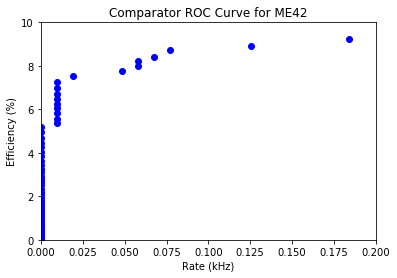

In [19]:
comp_efficiency=[0]
comp_sig_tot = len(comp_sig)
comp_rate=[0]
comp_bkg_tot = len(comp_bkg)
comp_limits=[0]
best = 0.0
best_cut = 150

for limit in tqdm(xrange(min_,max_,it_)):
    comp_efficiency.append(len(comp_sig[(comp_sig['Ev_max_nComp_ME42'] > limit)])/comp_sig_tot*100)
    
    comp_rate.append(len(comp_bkg[(comp_bkg['Ev_max_nComp_ME42'] > limit)])/comp_bkg_tot*30*1000)
    
    comp_limits.append(limit)
    
plt.plot(comp_rate,comp_efficiency,'bo')
plt.xlim(0,l2)
plt.ylim(0,10)
plt.xlabel('Rate (kHz)')
plt.ylabel('Efficiency (%)')
plt.title('Comparator ROC Curve for ME42')

for i in range(len(comp_rate)):
    if comp_rate[i] > 0.02 and comp_rate[i] < l2:
    #if comp_rate[i] > 0:
        #print 'rate =', comp_rate[i], 'kHz and efficiency =', comp_efficiency[i], '% for threshold >', comp_limits[i]
        if np.power(comp_efficiency[i],r2)/np.sqrt(comp_rate[i]) > best:
            best = np.power(comp_efficiency[i],r2)/np.sqrt(comp_rate[i])
            best_cut = comp_limits[i]
        
print "Best threshold > %i" %(best_cut)
print 'rate =', comp_rate[best_cut+1], 'kHz and efficiency =', comp_efficiency[best_cut+1], '% for threshold >', comp_limits[best_cut+1]
comp42 = best_cut

In [20]:
# comp11, comp12, comp13 = 83, 62, 29
# comp21, comp22 = 45, 40
# comp31, comp32 = 43, 31
# comp41, comp42 = 42, 31

# comp11, comp12, comp13 = 96, 65, 29
# comp21, comp22 = 48, 35
# comp31, comp32 = 45, 28
# comp41, comp42 = 41, 29

efficiency_comp_final = len(comp_sig[(comp_sig['Ev_max_nComp_ME11'] > comp11) | (comp_sig['Ev_max_nComp_ME12'] > comp12) | (comp_sig['Ev_max_nComp_ME13'] > comp13) |
                           (comp_sig['Ev_max_nComp_ME21'] > comp21) | (comp_sig['Ev_max_nComp_ME22'] > comp22) |
                           (comp_sig['Ev_max_nComp_ME31'] > comp31) | (comp_sig['Ev_max_nComp_ME32'] > comp32) |
                           (comp_sig['Ev_max_nComp_ME41'] > comp41) | (comp_sig['Ev_max_nComp_ME41'] > comp42)])/comp_sig_tot*100
                
rate_comp_final       = len(comp_bkg[(comp_bkg['Ev_max_nComp_ME11'] > comp11) | (comp_bkg['Ev_max_nComp_ME12'] > comp12) | (comp_bkg['Ev_max_nComp_ME13'] > comp13) |
                           (comp_bkg['Ev_max_nComp_ME21'] > comp21) | (comp_bkg['Ev_max_nComp_ME22'] > comp22) |
                           (comp_bkg['Ev_max_nComp_ME31'] > comp31) | (comp_bkg['Ev_max_nComp_ME32'] > comp32) |
                           (comp_bkg['Ev_max_nComp_ME41'] > comp41) | (comp_bkg['Ev_max_nComp_ME42'] > comp42)])/comp_bkg_tot*30*1000

print "rate =", rate_comp_final, "kHz, efficiency =", efficiency_comp_final, "%"

rate = 0.976625767642 kHz, efficiency = 31.4038825758 %


# Wire

100%|██████████| 150/150 [00:02<00:00, 60.67it/s]


Best threshold > 104
rate = 0.0190141420851 kHz and efficiency = 0.0788115222446 % for threshold > 104


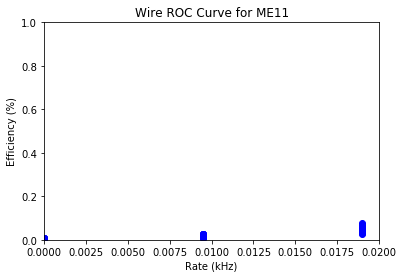

In [21]:
wire_efficiency=[0]
wire_sig_tot = len(wire_sig)
wire_rate=[0]
wire_bkg_tot = len(wire_bkg)
wire_limits=[0]
best = 0.0
best_cut = 150

for limit in tqdm(xrange(min_,max_,it_)):
    wire_efficiency.append(len(wire_sig[(wire_sig['Ev_max_nWire_ME11'] > limit)])/wire_sig_tot*100)
    
    wire_rate.append(len(wire_bkg[(wire_bkg['Ev_max_nWire_ME11'] > limit)])/wire_bkg_tot*30*1000)
    
    wire_limits.append(limit)
    
plt.plot(wire_rate,wire_efficiency,'bo')
plt.xlim(0,0.02)
plt.ylim(0,1)
plt.xlabel('Rate (kHz)')
plt.ylabel('Efficiency (%)')
plt.title('Wire ROC Curve for ME11')

for i in range(len(wire_rate)):
    if wire_rate[i] > 0 and wire_rate[i] < 0.02:
        #print 'rate =', wire_rate[i], 'kHz and efficiency =', wire_efficiency[i], '% for threshold >', wire_limits[i]
        if np.power(wire_efficiency[i],r1)/np.sqrt(wire_rate[i]) > best:
            best = np.power(wire_efficiency[i],r1)/np.sqrt(wire_rate[i])
            best_cut = wire_limits[i]
        
print "Best threshold > %i" %(best_cut)
print 'rate =', wire_rate[best_cut+1], 'kHz and efficiency =', wire_efficiency[best_cut+1], '% for threshold >', wire_limits[best_cut+1]
wire11 = best_cut

100%|██████████| 150/150 [00:00<00:00, 150.64it/s]


Best threshold > 92
rate = 0.180634349808 kHz and efficiency = 3.19974780313 % for threshold > 92


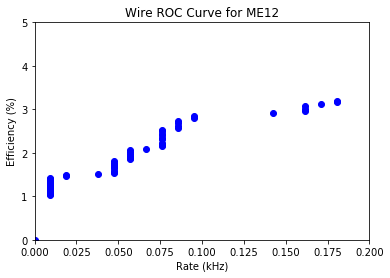

In [22]:
wire_efficiency=[0]
wire_sig_tot = len(wire_sig)
wire_rate=[0]
wire_bkg_tot = len(wire_bkg)
wire_limits=[0]
best=0.0
best_cut=150

for limit in tqdm(xrange(min_,max_,it_)):
    wire_efficiency.append(len(wire_sig[(wire_sig['Ev_max_nWire_ME12'] > limit)])/wire_sig_tot*100)
    
    wire_rate.append(len(wire_bkg[(wire_bkg['Ev_max_nWire_ME12'] > limit)])/wire_bkg_tot*30*1000)
    
    wire_limits.append(limit)
    
plt.plot(wire_rate,wire_efficiency,'bo')
plt.xlim(0,l2)
plt.ylim(0,5)
plt.xlabel('Rate (kHz)')
plt.ylabel('Efficiency (%)')
plt.title('Wire ROC Curve for ME12')

for i in range(len(wire_rate)):
    if wire_rate[i] > 0.02 and wire_rate[i] < l2:
        #print 'rate =', wire_rate[i], 'kHz and efficiency =', wire_efficiency[i], '% for threshold >', wire_limits[i]
        if np.power(wire_efficiency[i],r2)/np.sqrt(wire_rate[i]) > best:
            best = np.power(wire_efficiency[i],r2)/np.sqrt(wire_rate[i])
            best_cut = wire_limits[i]
        
print "Best threshold > %i" %(best_cut)
print 'rate =', wire_rate[best_cut+1], 'kHz and efficiency =', wire_efficiency[best_cut+1], '% for threshold >', wire_limits[best_cut+1]
wire12 = best_cut

100%|██████████| 150/150 [00:00<00:00, 221.19it/s]


Best threshold > 32
rate = 0.161620207723 kHz and efficiency = 3.38889545652 % for threshold > 32


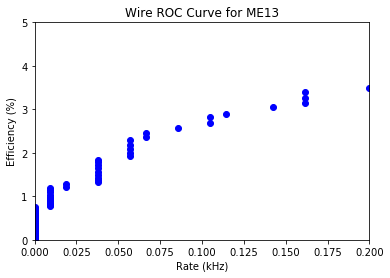

In [23]:
wire_efficiency=[0]
wire_sig_tot = len(wire_sig)
wire_rate=[0]
wire_bkg_tot = len(wire_bkg)
wire_limits=[0]
best=0.0
best_cut=150

for limit in tqdm(xrange(min_,max_,it_)):
    wire_efficiency.append(len(wire_sig[(wire_sig['Ev_max_nWire_ME13'] > limit)])/wire_sig_tot*100)
    
    wire_rate.append(len(wire_bkg[(wire_bkg['Ev_max_nWire_ME13'] > limit)])/wire_bkg_tot*30*1000)
    
    wire_limits.append(limit)
    
plt.plot(wire_rate,wire_efficiency,'bo')
plt.xlim(0,l2)
plt.ylim(0,5)
plt.xlabel('Rate (kHz)')
plt.ylabel('Efficiency (%)')
plt.title('Wire ROC Curve for ME13')

for i in range(len(wire_rate)):
    if wire_rate[i] > 0.02 and wire_rate[i] < l2:
        #print 'rate =', wire_rate[i], 'kHz and efficiency =', wire_efficiency[i], '% for threshold >', wire_limits[i]
        if np.power(wire_efficiency[i],r2)/np.sqrt(wire_rate[i]) > best:
            best = np.power(wire_efficiency[i],r2)/np.sqrt(wire_rate[i])
            best_cut = wire_limits[i]
        
print "Best threshold > %i" %(best_cut)
print 'rate =', wire_rate[best_cut+1], 'kHz and efficiency =', wire_efficiency[best_cut+1], '% for threshold >', wire_limits[best_cut+1]
wire13 = best_cut

100%|██████████| 150/150 [00:01<00:00, 82.56it/s]


Best threshold > 138
rate = 0.00950707104254 kHz and efficiency = 1.61563620601 % for threshold > 138


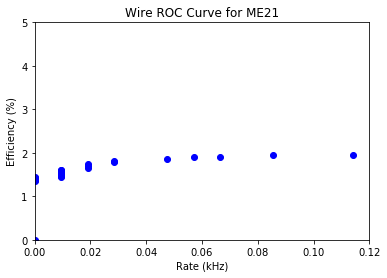

In [24]:
wire_efficiency=[0]
wire_sig_tot = len(wire_sig)
wire_rate=[0]
wire_bkg_tot = len(wire_bkg)
wire_limits=[0]
best=0.0
best_cut=150

for limit in tqdm(xrange(min_,max_,it_)):
    wire_efficiency.append(len(wire_sig[(wire_sig['Ev_max_nWire_ME21'] > limit)])/wire_sig_tot*100)
    
    wire_rate.append(len(wire_bkg[(wire_bkg['Ev_max_nWire_ME21'] > limit)])/wire_bkg_tot*30*1000)
    
    wire_limits.append(limit)
    
plt.plot(wire_rate,wire_efficiency,'bo')
plt.xlim(0,l1)
plt.ylim(0,5)
plt.xlabel('Rate (kHz)')
plt.ylabel('Efficiency (%)')
plt.title('Wire ROC Curve for ME21')

for i in range(len(wire_rate)):
    if wire_rate[i] > 0 and wire_rate[i] < l1:
        #print 'rate =', wire_rate[i], 'kHz and efficiency =', wire_efficiency[i], '% for threshold >', wire_limits[i]
        if np.power(wire_efficiency[i],r1)/np.sqrt(wire_rate[i]) > best:
            best = np.power(wire_efficiency[i],r1)/np.sqrt(wire_rate[i])
            best_cut = wire_limits[i]
        
print "Best threshold > %i" %(best_cut)
print 'rate =', wire_rate[best_cut+1], 'kHz and efficiency =', wire_efficiency[best_cut+1], '% for threshold >', wire_limits[best_cut+1]
wire21 = best_cut

100%|██████████| 150/150 [00:00<00:00, 179.60it/s]


Best threshold > 83
rate = 0.0380282841702 kHz and efficiency = 1.42254797651 % for threshold > 83


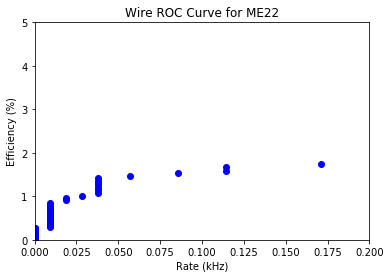

In [25]:
wire_efficiency=[0]
wire_sig_tot = len(wire_sig)
wire_rate=[0]
wire_bkg_tot = len(wire_bkg)
wire_limits=[0]
best=0.0
best_cut=150

for limit in tqdm(xrange(min_,max_,it_)):
    wire_efficiency.append(len(wire_sig[(wire_sig['Ev_max_nWire_ME22'] > limit)])/wire_sig_tot*100)
    
    wire_rate.append(len(wire_bkg[(wire_bkg['Ev_max_nWire_ME22'] > limit)])/wire_bkg_tot*30*1000)
    
    wire_limits.append(limit)
    
plt.plot(wire_rate,wire_efficiency,'bo')
plt.xlim(0,l2)
plt.ylim(0,5)
plt.xlabel('Rate (kHz)')
plt.ylabel('Efficiency (%)')
plt.title('Wire ROC Curve for ME22')

for i in range(len(wire_rate)):
    if wire_rate[i] > 0.02 and wire_rate[i] < l2:
        #print 'rate =', wire_rate[i], 'kHz and efficiency =', wire_efficiency[i], '% for threshold >', wire_limits[i]
        if np.power(wire_efficiency[i],r2)/np.sqrt(wire_rate[i]) > best:
            best = np.power(wire_efficiency[i],r2)/np.sqrt(wire_rate[i])
            best_cut = wire_limits[i]
        
print "Best threshold > %i" %(best_cut)
print 'rate =', wire_rate[best_cut+1], 'kHz and efficiency =', wire_efficiency[best_cut+1], '% for threshold >', wire_limits[best_cut+1]
wire22 = best_cut

100%|██████████| 150/150 [00:01<00:00, 112.68it/s]


Best threshold > 119
rate = 0.0570424262552 kHz and efficiency = 1.7732592505 % for threshold > 119


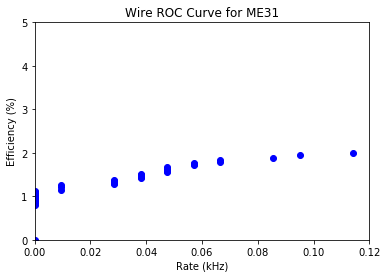

In [26]:
wire_efficiency=[0]
wire_sig_tot = len(wire_sig)
wire_rate=[0]
wire_bkg_tot = len(wire_bkg)
wire_limits=[0]
best=0.0
best_cut=150

for limit in tqdm(xrange(min_,max_,it_)):
    wire_efficiency.append(len(wire_sig[(wire_sig['Ev_max_nWire_ME31'] > limit)])/wire_sig_tot*100)
    
    wire_rate.append(len(wire_bkg[(wire_bkg['Ev_max_nWire_ME31'] > limit)])/wire_bkg_tot*30*1000)
    
    wire_limits.append(limit)
    
plt.plot(wire_rate,wire_efficiency,'bo')
plt.xlim(0,l1)
plt.ylim(0,5)
plt.xlabel('Rate (kHz)')
plt.ylabel('Efficiency (%)')
plt.title('Wire ROC Curve for ME31')

for i in range(len(wire_rate)):
    if wire_rate[i] > 0.02 and wire_rate[i] < l1:
        #print 'rate =', wire_rate[i], 'kHz and efficiency =', wire_efficiency[i], '% for threshold >', wire_limits[i]
        if np.power(wire_efficiency[i],r1)/np.sqrt(wire_rate[i]) > best:
            best = np.power(wire_efficiency[i],r1)/np.sqrt(wire_rate[i])
            best_cut = wire_limits[i]
        
print "Best threshold > %i" %(best_cut)
print 'rate =', wire_rate[best_cut+1], 'kHz and efficiency =', wire_efficiency[best_cut+1], '% for threshold >', wire_limits[best_cut+1]
wire31 = best_cut

100%|██████████| 150/150 [00:00<00:00, 183.35it/s]


Best threshold > 74
rate = 0.152113136681 kHz and efficiency = 1.07577727864 % for threshold > 74


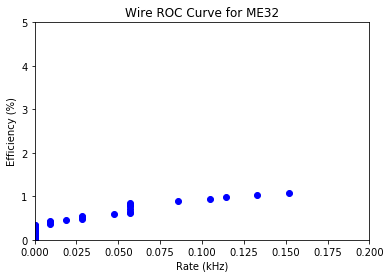

In [27]:
wire_efficiency=[0]
wire_sig_tot = len(wire_sig)
wire_rate=[0]
wire_bkg_tot = len(wire_bkg)
wire_limits=[0]
best=0.0
best_cut=150

for limit in tqdm(xrange(min_,max_,it_)):
    wire_efficiency.append(len(wire_sig[(wire_sig['Ev_max_nWire_ME32'] > limit)])/wire_sig_tot*100)
    
    wire_rate.append(len(wire_bkg[(wire_bkg['Ev_max_nWire_ME32'] > limit)])/wire_bkg_tot*30*1000)
    
    wire_limits.append(limit)
    
plt.plot(wire_rate,wire_efficiency,'bo')
plt.xlim(0,l2)
plt.ylim(0,5)
plt.xlabel('Rate (kHz)')
plt.ylabel('Efficiency (%)')
plt.title('Wire ROC Curve for ME32')

for i in range(len(wire_rate)):
    if wire_rate[i] > 0.02 and wire_rate[i] < l2:
        #print 'rate =', wire_rate[i], 'kHz and efficiency =', wire_efficiency[i], '% for threshold >', wire_limits[i]
        if np.power(wire_efficiency[i],r2)/np.sqrt(wire_rate[i]) > best:
            best = np.power(wire_efficiency[i],r2)/np.sqrt(wire_rate[i])
            best_cut = wire_limits[i]
        
print "Best threshold > %i" %(best_cut)
print 'rate =', wire_rate[best_cut+1], 'kHz and efficiency =', wire_efficiency[best_cut+1], '% for threshold >', wire_limits[best_cut+1]
wire32 = best_cut

100%|██████████| 150/150 [00:01<00:00, 105.81it/s]


Best threshold > 127
rate = 0.0285212131276 kHz and efficiency = 3.08547109587 % for threshold > 127


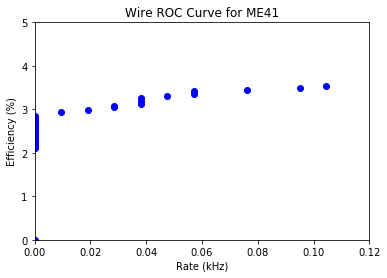

In [28]:
wire_efficiency=[0]
wire_sig_tot = len(wire_sig)
wire_rate=[0]
wire_bkg_tot = len(wire_bkg)
wire_limits=[0]
best=0.0
best_cut=150

for limit in tqdm(xrange(min_,max_,it_)):
    wire_efficiency.append(len(wire_sig[(wire_sig['Ev_max_nWire_ME41'] > limit)])/wire_sig_tot*100)
    
    wire_rate.append(len(wire_bkg[(wire_bkg['Ev_max_nWire_ME41'] > limit)])/wire_bkg_tot*30*1000)
    
    wire_limits.append(limit)
    
plt.plot(wire_rate,wire_efficiency,'bo')
plt.xlim(0,l1)
plt.ylim(0,5)
plt.xlabel('Rate (kHz)')
plt.ylabel('Efficiency (%)')
plt.title('Wire ROC Curve for ME41')

for i in range(len(wire_rate)):
    if wire_rate[i] > 0.02 and wire_rate[i] < l1:
        #print 'rate =', wire_rate[i], 'kHz and efficiency =', wire_efficiency[i], '% for threshold >', wire_limits[i]
        if np.power(wire_efficiency[i],r1)/np.sqrt(wire_rate[i]) > best:
            best = np.power(wire_efficiency[i],r1)/np.sqrt(wire_rate[i])
            best_cut = wire_limits[i]
        
print "Best threshold > %i" %(best_cut)
print 'rate =', wire_rate[best_cut+1], 'kHz and efficiency =', wire_efficiency[best_cut+1], '% for threshold >', wire_limits[best_cut+1]
wire41 = best_cut

100%|██████████| 150/150 [00:00<00:00, 159.06it/s]


Best threshold > 86
rate = 0.123591923553 kHz and efficiency = 1.09942073531 % for threshold > 86


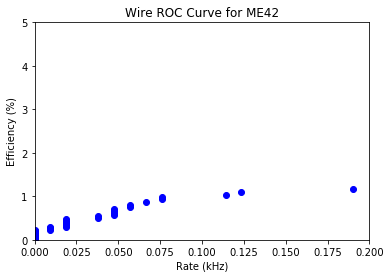

In [29]:
wire_efficiency=[0]
wire_sig_tot = len(wire_sig)
wire_rate=[0]
wire_bkg_tot = len(wire_bkg)
wire_limits=[0]
best=0.0
best_cut=150

for limit in tqdm(xrange(min_,max_,it_)):
    wire_efficiency.append(len(wire_sig[(wire_sig['Ev_max_nWire_ME42'] > limit)])/wire_sig_tot*100)
    
    wire_rate.append(len(wire_bkg[(wire_bkg['Ev_max_nWire_ME42'] > limit)])/wire_bkg_tot*30*1000)
    
    wire_limits.append(limit)
    
plt.plot(wire_rate,wire_efficiency,'bo')
plt.xlim(0,l2)
plt.ylim(0,5)
plt.xlabel('Rate (kHz)')
plt.ylabel('Efficiency (%)')
plt.title('Wire ROC Curve for ME42')

for i in range(len(wire_rate)):
    if wire_rate[i] > 0.02 and wire_rate[i] < l2:
        #print 'rate =', wire_rate[i], 'kHz and efficiency =', wire_efficiency[i], '% for threshold >', wire_limits[i]
        if np.power(wire_efficiency[i],r2)/np.sqrt(wire_rate[i]) > best:
            best = np.power(wire_efficiency[i],r2)/np.sqrt(wire_rate[i])
            best_cut = wire_limits[i]
        
print "Best threshold > %i" %(best_cut)
print 'rate =', wire_rate[best_cut+1], 'kHz and efficiency =', wire_efficiency[best_cut+1], '% for threshold >', wire_limits[best_cut+1]
wire42 = best_cut

In [30]:
# wire11, wire12, wire13 = 94, 101, 40
# wire21, wire22 = 128, 83
# wire31, wire32 = 117, 79
# wire41, wire42 = 121, 90

wire11, wire12, wire13 = 103, 105, 40
wire21, wire22 = 131, 82
wire31, wire32 = 122, 75
wire41, wire42 = 118, 85

efficiency_wire_final = len(wire_sig[(wire_sig['Ev_max_nWire_ME11'] > wire11) | (wire_sig['Ev_max_nWire_ME12'] > wire12) | (wire_sig['Ev_max_nWire_ME13'] > wire13) |
                                     (wire_sig['Ev_max_nWire_ME21'] > wire21) | (wire_sig['Ev_max_nWire_ME22'] > wire22) |
                                     (wire_sig['Ev_max_nWire_ME31'] > wire31) | (wire_sig['Ev_max_nWire_ME32'] > wire32) |
                                     (wire_sig['Ev_max_nWire_ME41'] > wire41) | (wire_sig['Ev_max_nWire_ME42'] > wire42)])/wire_sig_tot*100
                
rate_wire_final       = len(wire_bkg[(wire_bkg['Ev_max_nWire_ME11'] > wire11) | (wire_bkg['Ev_max_nWire_ME12'] > wire12) | (wire_bkg['Ev_max_nWire_ME13'] > wire13) |
                           (wire_bkg['Ev_max_nWire_ME21'] > wire21) | (wire_bkg['Ev_max_nWire_ME22'] > wire22) |
                           (wire_bkg['Ev_max_nWire_ME31'] > wire31) | (wire_bkg['Ev_max_nWire_ME32'] > wire32) |
                           (wire_bkg['Ev_max_nWire_ME41'] > wire41) | (wire_bkg['Ev_max_nWire_ME42'] > wire42)])/wire_bkg_tot*30*1000

print "rate =", rate_wire_final, "kHz, efficiency =", efficiency_wire_final, "%"

rate = 0.760565683403 kHz, efficiency = 15.0805847815 %


# Results

In [31]:
print "Optimal Comparator Thresholds:"
print "ME11: %i, ME12: %i, ME13: %i," %(comp11,comp12,comp13)
print "ME21: %i, ME22: %i," %(comp21,comp22)
print "ME31: %i, ME32: %i," %(comp31,comp32)
print "ME41: %i, ME42: %i," %(comp41,comp42)
print "With rate and efficiency:"
print "rate = %f kHz, efficiency = %f%%" %(rate_comp_final,efficiency_comp_final)
print
print "Optimal Wire Thresholds:"
print "ME11: %i, ME12: %i, ME13: %i," %(wire11,wire12,wire13)
print "ME21: %i, ME22: %i," %(wire21,wire22)
print "ME31: %i, ME32: %i," %(wire31,wire32)
print "ME41: %i, ME42: %i," %(wire41,wire42)
print "With rate and efficiency:"
print "rate = %f kHz, efficiency = %f%%" %(rate_wire_final,efficiency_wire_final)

Optimal Comparator Thresholds:
ME11: 97, ME12: 56, ME13: 24,
ME21: 49, ME22: 35,
ME31: 42, ME32: 28,
ME41: 42, ME42: 31,
With rate and efficiency:
rate = 0.976626 kHz, efficiency = 31.403883%

Optimal Wire Thresholds:
ME11: 103, ME12: 105, ME13: 40,
ME21: 131, ME22: 82,
ME31: 122, ME32: 75,
ME41: 118, ME42: 85,
With rate and efficiency:
rate = 0.760566 kHz, efficiency = 15.080585%
